In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
folder_path = r'D:\mlpr data\radiomic_features_CaPTk'

radiomic_files = [f for f in os.listdir(folder_path) if f.startswith('Radiomic')]
print(radiomic_files)

['Radiomic_Features_CaPTk_automaticsegm_DSC_ap-rCBV_ED.csv', 'Radiomic_Features_CaPTk_automaticsegm_DSC_ap-rCBV_ET.csv', 'Radiomic_Features_CaPTk_automaticsegm_DSC_ap-rCBV_NC.csv', 'Radiomic_Features_CaPTk_automaticsegm_DSC_PH_ED.csv', 'Radiomic_Features_CaPTk_automaticsegm_DSC_PH_ET.csv', 'Radiomic_Features_CaPTk_automaticsegm_DSC_PH_NC.csv', 'Radiomic_Features_CaPTk_automaticsegm_DSC_PSR_ED.csv', 'Radiomic_Features_CaPTk_automaticsegm_DSC_PSR_ET.csv', 'Radiomic_Features_CaPTk_automaticsegm_DSC_PSR_NC.csv', 'Radiomic_Features_CaPTk_automaticsegm_DTI_AD_ED.csv', 'Radiomic_Features_CaPTk_automaticsegm_DTI_AD_ET.csv', 'Radiomic_Features_CaPTk_automaticsegm_DTI_AD_NC.csv', 'Radiomic_Features_CaPTk_automaticsegm_DTI_FA_ED.csv', 'Radiomic_Features_CaPTk_automaticsegm_DTI_FA_ET.csv', 'Radiomic_Features_CaPTk_automaticsegm_DTI_FA_NC.csv', 'Radiomic_Features_CaPTk_automaticsegm_DTI_RD_ED.csv', 'Radiomic_Features_CaPTk_automaticsegm_DTI_RD_ET.csv', 'Radiomic_Features_CaPTk_automaticsegm_DTI_RD_

In [5]:
currCSV = radiomic_files[0]
df = pd.read_csv(os.path.join(folder_path, currCSV))
df.head()

,SubjectID,DSC_ap-rCBV_ED_Intensity_CoefficientOfVariation,DSC_ap-rCBV_ED_Intensity_Energy,DSC_ap-rCBV_ED_Intensity_InterQuartileRange,DSC_ap-rCBV_ED_Intensity_Kurtosis,DSC_ap-rCBV_ED_Intensity_Maximum,DSC_ap-rCBV_ED_Intensity_Mean,DSC_ap-rCBV_ED_Intensity_MeanAbsoluteDeviation,DSC_ap-rCBV_ED_Intensity_Median,DSC_ap-rCBV_ED_Intensity_MedianAbsoluteDeviation,...,DSC_ap-rCBV_ED_GLSZM_Bins-16_Radius-1_ZoneSizeMean,DSC_ap-rCBV_ED_GLSZM_Bins-16_Radius-1_ZoneSizeNonUniformity,DSC_ap-rCBV_ED_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUniformityNormalized,DSC_ap-rCBV_ED_GLSZM_Bins-16_Radius-1_ZoneSizeVariance,DSC_ap-rCBV_ED_NGTDM_Busyness,DSC_ap-rCBV_ED_NGTDM_Coarsness,DSC_ap-rCBV_ED_NGTDM_Complexity,DSC_ap-rCBV_ED_NGTDM_Contrast,DSC_ap-rCBV_ED_NGTDM_Strength,DSC_ap-rCBV_ED_LBP_Radius-1_Bins-16_LBP
0,UPENN-GBM-00001_11,0.780117,78795500,46,5.243152,255,47.649409,-9.916535e-13,35,12.649409,...,43.940937,105.391039,0.214646,1.447637e+05,170.017679,0.000104,477.387212,0.159791,0.021747,1.735972e+05
1,UPENN-GBM-00002_11,1.008908,247711011,28,8.722965,255,28.122532,7.197092e-12,19,9.122532,...,91.250441,336.506173,0.197828,3.692916e+06,1410.892639,0.000016,389.127343,0.060336,0.005554,1.222531e+06
2,UPENN-GBM-00003_11,1.034780,25529631,12,25.149419,255,15.956322,-7.103815e-13,11,4.956322,...,110.302961,90.348519,0.205805,2.680774e+06,726.594643,0.000036,311.035791,0.013814,0.030951,3.844991e+05
3,UPENN-GBM-00004_11,0.778582,119373029,53,3.938521,255,47.661073,-3.032409e-12,39,8.661073,...,45.823529,150.403361,0.210649,1.391095e+05,224.150859,0.000077,478.297483,0.157758,0.014250,2.663995e+05
4,UPENN-GBM-00005_11,0.803134,201991541,46,4.754281,249,42.689646,-1.349022e-11,38,4.689646,...,85.180784,177.131479,0.223934,7.784751e+05,474.977510,0.000037,465.490128,0.130572,0.007739,4.892896e+05


In [6]:
#Count for number of scans for same patient/SubjectID , and print more than ones
df['SubjectID'].value_counts()[df['SubjectID'].value_counts() > 1]

Series([], Name: count, dtype: int64)

In [7]:
# check for duplicates and missing values
print((df.duplicated().sum()))
print((df.isnull().sum()>0).count())

0
145


In [8]:

from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
numeric_df = df.select_dtypes(include=[np.number])  # Keep only numeric columns
correlation_matrix = numeric_df.corr()

target_corr = correlation_matrix["DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_QuartileCoefficientOfVariation"]
most_correlated = target_corr.abs().sort_values(ascending=False).iloc[1:4].index  # Top 3 correlated

train_data = df.dropna(subset=["DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_QuartileCoefficientOfVariation"])
X_train = train_data[most_correlated]
y_train = train_data["DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_QuartileCoefficientOfVariation"]

model = LinearRegression()
model.fit(X_train, y_train)

missing_data = df[df["DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_QuartileCoefficientOfVariation"].isnull()]
X_missing = missing_data[most_correlated]
predicted_values = model.predict(X_missing)

df.loc[df["DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_QuartileCoefficientOfVariation"].isnull(),
       "DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_QuartileCoefficientOfVariation"] = predicted_values

In [15]:
# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data (for columns with numeric values)
df_imp = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])))
df_imp.columns = df.select_dtypes(include=['float64', 'int64']).columns

# If you have categorical columns, impute those as well (using 'most_frequent' strategy for example)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include=['object']).columns] = imputer_cat.fit_transform(df.select_dtypes(include=['object']))

# verify the null values are gone
for col in df_imp.columns:
    if df_imp[col].isnull().sum() > 0:
        print(col, df_imp[col].isnull().sum())

In [16]:
print("Int: ",(df.dtypes=="int").sum())
print("Float: ",(df.dtypes=="float").sum())
print("Object: ",(df.dtypes=="object").sum())

Int:  49
Float:  95
Object:  1


From above observation, given numerical features we should normalize them and 

144


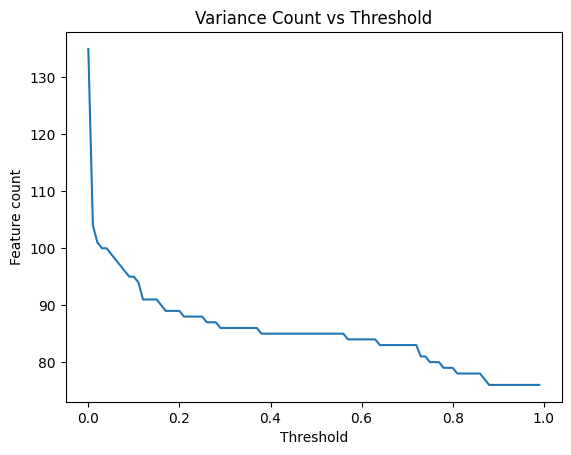

In [17]:
variance = df_imp.var()
print(variance.count())
# plot variance count vs threshold between 0 and 1
y = []
for i in np.arange(0, 1, 0.01):
    # print('Threshold: ', i, ' Count: ', (variance > i).sum())
    y.append((variance > i).sum())

plt.plot(np.arange(0, 1, 0.01),y)
plt.xlabel('Threshold')
plt.ylabel('Feature count')
plt.title('Variance Count vs Threshold')
plt.show()

0.15 can be a potential threshold value of min variance

In [18]:
# Filter columns where variance is greater than or equal to 0.15
df_imp_fil = df_imp.loc[:, variance >= 0.15]
print(df_imp_fil.shape)

(474, 91)


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_imp_f_mm = pd.DataFrame(min_max_scaler.fit_transform(df_imp_fil), columns=df_imp_fil.columns)

scaler = StandardScaler()
df_imp_f_z = pd.DataFrame(scaler.fit_transform(df_imp_fil), columns=df_imp_fil.columns)

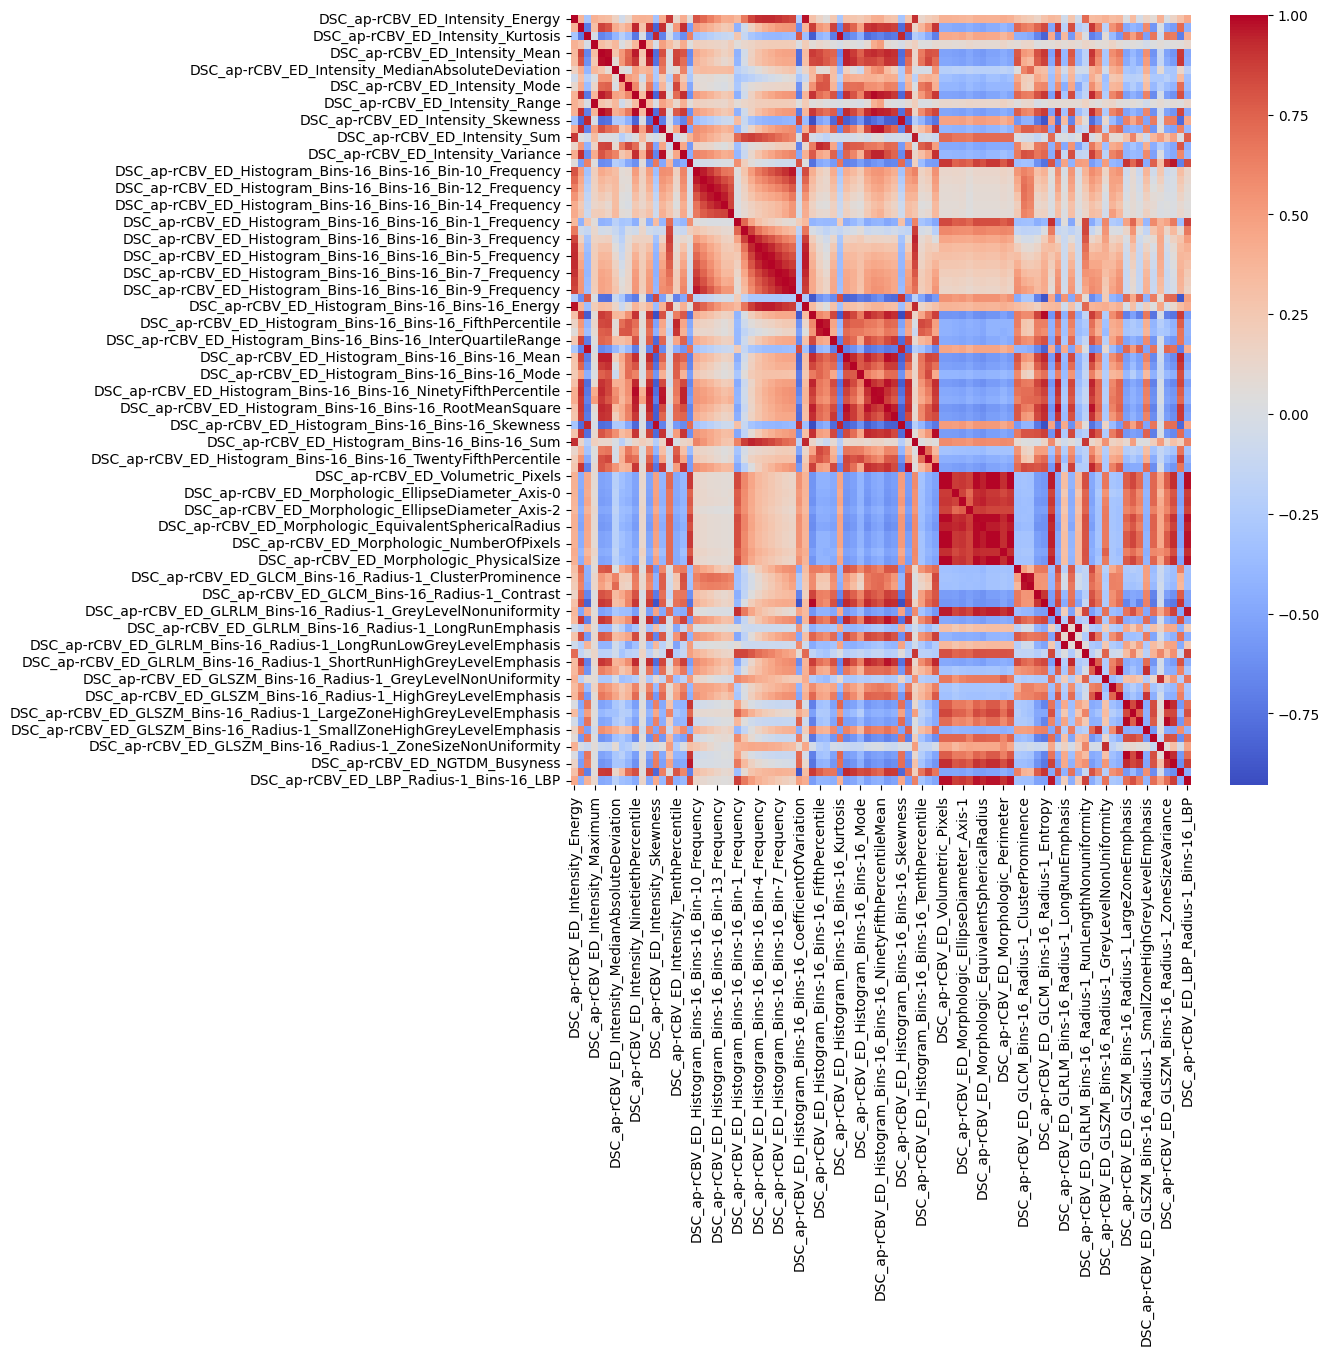

In [20]:
# Coorelation matrix
corr = df_imp_f_z.corr()
# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

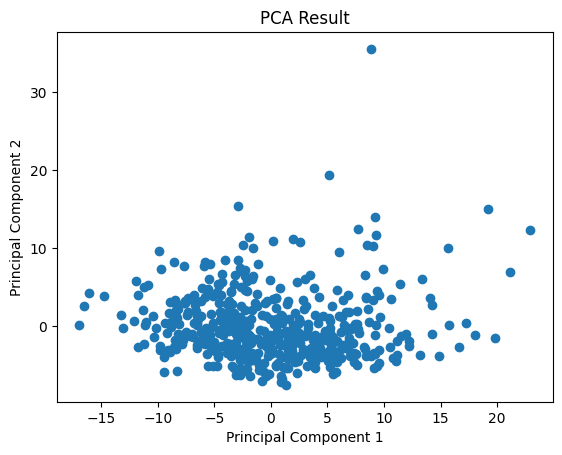

Explained variance ratio: [0.46224576 0.21855822 0.06976165 0.05283834 0.03215062 0.02804334
 0.02261609 0.01733426 0.01475891 0.01212918 0.0096183  0.0069973 ]
Stored explained variance ratio: [0.46224576 0.21855822 0.06976165 0.05283834 0.03215062 0.02804334
 0.02261609 0.01733426 0.01475891 0.01212918 0.0096183  0.0069973 ]


In [35]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# PCA transformation with 32 components
pca = PCA(n_components=12)  # You can change n_components based on how many components you want to keep
pca_result = pca.fit_transform(df_imp_f_z)

# Convert the PCA result to a DataFrame for easier manipulation
pca_columns = [f'PC{i+1}' for i in range(12)]  # Generate column names dynamically for 32 components
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

# Optional: Plot the results (if you're using 2 components)
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Check how much variance is explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

# If you want to store and print the explained variance ratio as a separate variable
a = explained_variance
print(f"Stored explained variance ratio: {a}")


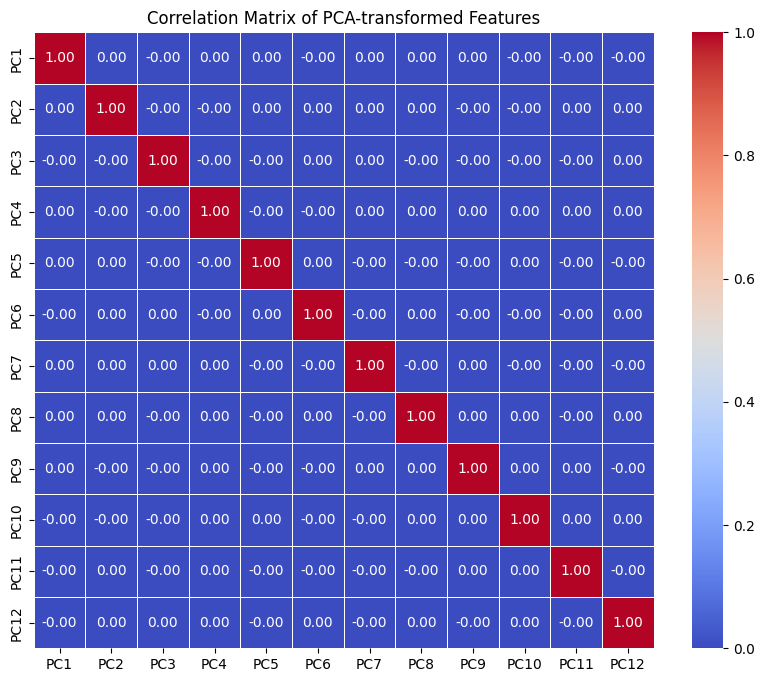

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pca_df is your PCA-transformed DataFrame

# Compute the correlation matrix
correlation_matrix = pca_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix of PCA-transformed Features')

# Display the heatmap
plt.show()
